# RECOMENDACION DE PLANES MEGALINE
En este proyecto se busca entrenar un modelo de machine learning, para que la computadora haga una recomendación del plan mas adecuado de acuerdo al cliente

Objetivos:
- Procesar los datos y dividirlos para generar un dataset de entrenamiento, uno de validación y otro de prueba.
- Investigar la calidad de diferentes modelos (tomando en cuenta sus hiper parámtros).
- Validar la calidad del modelo escogido con el conjunto de prueba.
- Hacer una prueba de cordura del modelo

## IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import numpy as np

## IMPORTACIÓN DE LOS DATOS

In [2]:
user_info = pd.read_csv('/datasets/users_behavior.csv')
print(user_info)

      calls  minutes  messages   mb_used  is_ultra
0      40.0   311.90      83.0  19915.42         0
1      85.0   516.75      56.0  22696.96         0
2      77.0   467.66      86.0  21060.45         0
3     106.0   745.53      81.0   8437.39         1
4      66.0   418.74       1.0  14502.75         0
...     ...      ...       ...       ...       ...
3209  122.0   910.98      20.0  35124.90         1
3210   25.0   190.36       0.0   3275.61         0
3211   97.0   634.44      70.0  13974.06         0
3212   64.0   462.32      90.0  31239.78         0
3213   80.0   566.09       6.0  29480.52         1

[3214 rows x 5 columns]


## ANÁLISIS DE DATOS

### Comprobación de tipos de dato, nulos, duplicados

In [3]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
#comprobación de duplicados
user_info[user_info.duplicated()]

,calls,minutes,messages,mb_used,is_ultra


In [5]:
#Comprobación de que la columna target tenga solo los datos 0 o 1
user_info['is_ultra'].unique()

array([0, 1])

## SEGMENTACIÓN DE DATOS

### Separación Columnas de Características y Objetivo

In [6]:
features = user_info.drop(['is_ultra'],axis=1)
target = user_info['is_ultra']

### División de datos en 3 conjuntos: entrenamiento, validación, prueba

In [7]:
#Separación del data frame en train 60% y temporal 40% (se va a volver a dividir)
train_features,temp_features,train_target,temp_target = train_test_split(features,target,
                                                                         test_size=0.4,
                                                                        random_state=54321) 

In [8]:
#Comprobación de que la separación se realizó correctamente
print(train_features.shape)
print(train_target.shape)
print(temp_features.shape)
print(temp_target.shape)

(1928, 4)
(1928,)
(1286, 4)
(1286,)


In [9]:
#Separación del data frame temp en validate 50% y test 50% 
val_features,test_features,val_target,test_target = train_test_split(temp_features,temp_target,
                                                                         test_size=0.5,
                                                                        random_state=54321) 

In [10]:
#Comprobación de que la separación se realizó correctamente
print(val_features.shape)
print(val_target.shape)
print(test_features.shape)
print(test_target.shape)

(643, 4)
(643,)
(643, 4)
(643,)


## CALIDAD DE MODELOS DE CLASIFICACIÍON

### Comparación de Modelos 

#### Árbol de Decisión

In [11]:
#Entrenamiento de modelo y prueba de exactitud conjunto de validación
best_acc = 0

#Lazo incremento hiperparametro de profundidad del árbol y comparación de exactitud
for depth in range(1,11):
    model_dt = DecisionTreeClassifier(random_state=54321,max_depth=depth)
    model_dt.fit(train_features,train_target)
    predictions_dt = model_dt.predict(val_features)
    accuracy = accuracy_score(val_target,predictions_dt)
    print('la exactitud para',depth,'es:',accuracy)
    if accuracy > best_acc:
        best_acc = accuracy
        best_depth=depth
        
print ('La mayor exactitud es:',best_acc,'con una profundidad de árbol de:',best_depth)

la exactitud para 1 es: 0.7216174183514774
la exactitud para 2 es: 0.7418351477449455
la exactitud para 3 es: 0.7651632970451011
la exactitud para 4 es: 0.744945567651633
la exactitud para 5 es: 0.7651632970451011
la exactitud para 6 es: 0.7542768273716952
la exactitud para 7 es: 0.7433903576982893
la exactitud para 8 es: 0.7511664074650077
la exactitud para 9 es: 0.7682737169517885
la exactitud para 10 es: 0.7822706065318819
La mayor exactitud es: 0.7822706065318819 con una profundidad de árbol de: 10


In [12]:
#Prueba de exactitud con los datos de entrenamiento
model_dt2 = DecisionTreeClassifier(random_state=54321,max_depth=10)
model_dt2.fit(train_features,train_target)
predictions_dt2 = model_dt2.predict(train_features)
accuracy= accuracy_score(train_target,predictions_dt2)
print('La exactitud con conjunto de entrenamiento:',accuracy)

La exactitud con conjunto de entrenamiento: 0.883298755186722


#### Bosque Aleatorio

In [13]:
#Entrenamiento de modelo y prueba de exactitud  conjunto de validación
best_score = 0

#Lazo de modificación hiperparámetros y comparación de exactitud
for est in range(1,61,10):
    for depth in range(1,11):
        model_rf = RandomForestClassifier(random_state = 54321, n_estimators = est, max_depth = depth)
        model_rf.fit(train_features,train_target)
        score = model_rf.score(val_features,val_target)
        #print('La exactitud es;',score,'con una profundidad:',depth, 'y n_estimators:',est)
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth

print ('La mayor exactitud es:',best_score,'con una profundidad de árbol de:',best_depth, 'y n_estimators',best_est)

La mayor exactitud es: 0.7978227060653188 con una profundidad de árbol de: 8 y n_estimators 11


#### REGRESIÓN LOGÍSTICA

In [21]:
model_lr = LogisticRegression(random_state = 54321, solver = 'liblinear')
model_lr.fit(train_features,train_target)

score = model_lr.score(val_features,val_target)

print ('La exactitud del modelo es:',score)

La exactitud del modelo es: 0.6780715396578538


Comparando la calidad de los modelos en base a su exactitud, podemos afirmar que:
- El árbol de decisión tiene una exactitud alta con una profundidad de 10, esto puede implicar un sobreajuste, aunque tomando en cuenta la predicción de los datos de entrenamiento, que no está cercana al 100 (0.88), puede significar que el modelo no está memorizando los datos.
- Haciendo el entrenamiento del bosque aleatorio y comparando las respuestas que daban ante los cambios en sus hiperparámentros, establecimos que la combinación mas exacta fue 8 de profundidad y 11 de n_estimators, logrando superar (por muy poco) al árbol de decisión.
- La Regresión logística obtuvo el número más bajo de exactitud, incluso siendo superado por el árbol de decisión.

### Calidad del Modelo con Conjunto de Prueba

In [15]:
#Pruba con Árbol de decisión depth 10
model_dt = DecisionTreeClassifier(random_state=54321,max_depth=10)
model_dt.fit(train_features,train_target)
prediction=model_dt.predict(test_features)
accuracy = accuracy_score(test_target,prediction)
print(accuracy)

0.8055987558320373


In [16]:
#Prueba con Random Forest depth 8 y n_estimators 11
model_rf = RandomForestClassifier(random_state=54321,max_depth=8,n_estimators=11)
model_rf.fit(train_features,train_target)
score = model_rf.score(test_features,test_target)
print(score)

0.8367029548989113


In [17]:
#Prueba con Logistic Regression
model_lr = LogisticRegression(random_state=54321,solver='liblinear')
model_lr.fit(train_features,train_target)
score = model_lr.score(test_features,test_target)
print (score)

0.7402799377916018


El modelo con mejor exactitud, como era de esperarse, es el Árbol Aleatorio, con un score de 0.83 para el conjunto de prueba y los hiperparámetros definidos en la etapa anterior. 

## PRUEBA DE CORDURA PARA EL MODELO RANDOM FOREST

### Verificar la importancia de las características

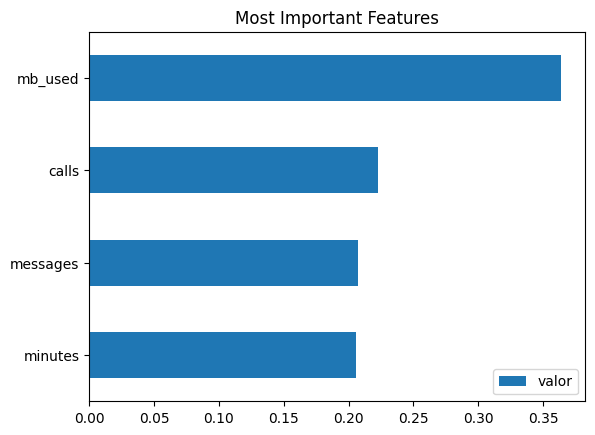

In [18]:
#ver las columnas que utilizó para clasificar el arbol
main_column= pd.DataFrame({'valor':model_rf.feature_importances_},index=['calls','minutes','messages','mb_used'])
main_column.sort_values(by='valor', ascending=True,inplace=True)
main_column.plot(kind='barh',title='Most Important Features')
plt.show()

- La columna mb_used es la que tiene mayor peso después del entrenamiento del modelo, esto tiene sentido puesto que en la actualidad el tráfico de internet es prioritario sobre mensajes de texto o llamadas convencionales. 
- El resto de features tienen un peso prácticamente idéntico.

### Verificación con un Conjunto de Datos Aleatorio

In [19]:
#Aplicación de datos aleatorios para el target de entrenamiento
target_random = shuffle(train_target)
model_rf.fit(train_features, target_random)
score_rand = model_rf.score(test_features, test_target)
print('Exactitud con datos aleatorios:',score_rand)


Exactitud con datos aleatorios: 0.7200622083981337


Un bajón en el score respecto al modelo entrenado con los datos originales(0.83 - 0,71) , nos dice que el modelo está trabajando correctamente, ya que no ha creado patrones irrelevantes en su entrenamiento, que puedan llegar a mantener un score alto a pesar de cambiar los datos de la columna plan sin ninguna relación con los features, y luego predecir con el mismo conjunto de prueba original.

### Validación Cruzada

In [20]:
#Exactitud para 5 subconjutos 
scores = cross_val_score(model_rf, features, target, cv=5)  
print('Scores de Validación cruzada:',scores)
print('Promedio de los scores:', np.mean(scores))

Scores de Validación cruzada: [0.81648523 0.77604977 0.80559876 0.80093313 0.81152648]
Promedio de los scores: 0.8021186707557545


Los scores para 5 subconjuntos se mantienen consistentes y cercanos a 0.8 (media), igual que el score para el conjunto de prueba que llegó a los 0.83

## CONCLUSIONES

- Se importaron los datos para los usuarios de Megaline, y se compobó que no existan faltantes, duplicados, tipo de datos correctos.
- La segmenración para aplicar los conjuntos a los modelos, se realizaron en base a la recomendación cuando van a existir 3 grupos, esto es: 60% para entrenamiento, 20% para validación y 20% para prueba.
- En cuanto a la exactitud de cada modelo:
    - El árbol de decisión tiene una exactitud alta con una profundidad de 10, esto puede implicar un sobreajuste, aunque tomando en cuenta la predicción de los datos de entrenamiento, que no está cercana al 100 (0.88), puede significar que el modelo no está memorizando los datos.
    - Haciendo el entrenamiento del bosque aleatorio y comparando las respuestas que daban ante los cambios en sus hiperparámentros, establecimos que la combinación mas exacta fue 8 de profundidad y 11 de n_estimators, logrando superar (por muy poco) al árbol de decisión.
    - La Regresión logística obtuvo el número más bajo de exactitud, incluso siendo superado por el árbol de decisión.
    - El modelo mas adecuado por exactitud y para evitar en la medida de lo posible el sobreajuste por profundidad, es el random forest, esto siempre y cuando el procesamiento que se requiere no sea un problema.
- Se comprobó el score para los 3 modelos, y se confirmó que el de mayor exactitud es el random forest, seguido del árbol de decisión y este último superando a Regresión Logística.
- La exactitud que se consiguió con el Bosque Aleatorio llegó a un 0.83
- En cuanto a la cordura del modelo:
    - La columna mb_used es la que tiene mayor peso después del entrenamiento del modelo, esto tiene sentido puesto que en la actualidad el tráfico de internet es prioritario sobre mensajes de texto o llamadas convencionales.Mientras el resto de features tienen un peso prácticamente idéntico.
    - La validación con datos aleatorios confirma que los patrones generados por el modelo están correctamente ajustados de acuerdo al target original.
    - La validación cruzada nos indica que el score se mantiene estable para diferentes subconjuntos de los datos (0.8)